# Langevin Monte Carlo

For the moment, let's state the following as facts:

Simulating $\dot{x} = -\nabla V(x) + \sqrt{2T}\eta(t)$ produces a markov chain with limiting distribution $p(x)\propto e^{-\beta V(x)}$.

Numerically, we introduce the learning rate $\epsilon$:

$$
x_{t+1} = x_t - \epsilon \nabla V(x_t) + \sqrt{2T\epsilon}\eta_t
$$

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# parameters
T = 0.1
lr = 0.01
nstep = 8000

x0 = 5

In [14]:
def gaussian(x, beta):
    return np.exp(-beta * x**2)

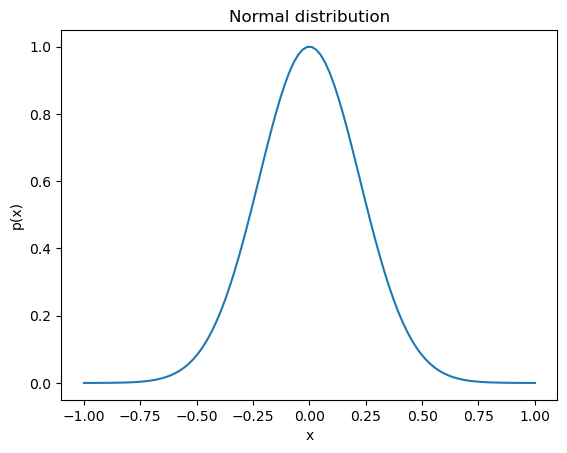

In [15]:
# plot the objective distribution
x = np.linspace(-1,1,100)
p = gaussian(x, 1/T)

plt.plot(x, p)
plt.xlabel("x")
plt.ylabel("p(x)")
plt.title("Normal distribution")
plt.show()

In [16]:
def langevin(x, lr, T):
    return x - lr * x + np.sqrt(2*lr*T) * np.random.randn()

In [17]:
x = [x0]
epoch = [0]

for i in range(nstep):
    epoch.append(i+1)
    x.append(langevin(x[i],lr, T))

Text(0, 0.5, 'x')

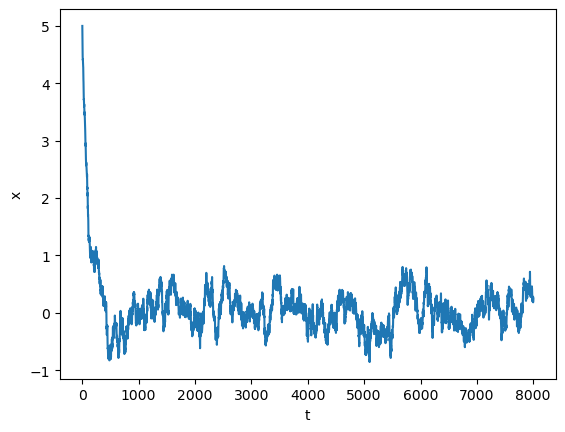

In [18]:
plt.plot(epoch, x)
plt.xlabel("t")
plt.ylabel("x")

In [19]:
def autocorrelation(x, max_lag):
    n = len(x)
    mean = np.mean(x)
    var = np.var(x)
    acf = [np.correlate(x[:n-lag] - mean, x[lag:] - mean)[0] / (var * (n - lag))
           for lag in range(max_lag)]
    return np.array(acf)

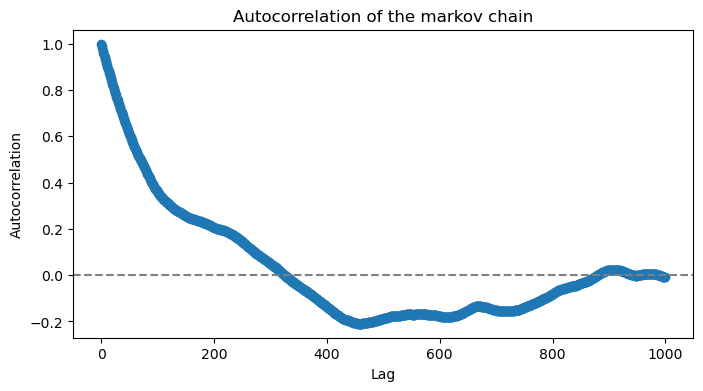

In [20]:
max_lag = 1000  # Adjust as needed
acf_test_mse = autocorrelation(x, max_lag)

plt.figure(figsize=(8, 4))
plt.plot(range(max_lag), acf_test_mse, marker='o')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of the markov chain")
plt.show()